# Project For Data Mining - Student Stress Analysis
## Agampreet Bajaj

**Hello everyone! This is my visualization project for data mining, where I will be reviewing the dataset about student stress levels.**

## What are we solving?
I wanted to understand the various factors that induce stress levels in students. I wanted to analyze these features in many different ways, and I think with data like this, it would be better to check the data out and see how to analyze it. But some things I want to check are how breathing problems relate to sleep quality. Or how living conditions and mental health history are related to academic performance. I would lastly want to check how these can affect a students stres levels.

## What is the data?
I found this data from [Kaggle](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets?resource=download) and it is about measuring stress levels in students.<br/>
What I found out is that there was a survey of 843 students and they answered in rating format. On the Kaggle notebook, there is more information about the questions asked and how the questions were given. But essentialy it was a student survey with topics such as demographic data, emotions stress indicators, physical health indicators, academic indicators, and social indicators. There are 20 key features that are used in this dataset.


I will now import the libraries I belive are needed for analysis and visualization, and then we can start loading in the data to preprocess.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stress_df = pd.read_csv("StressLevelDataSet.csv")
stress_df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


## Confusing numbers?!
As you can see from above, there are many columns that are numerical that don't seem to make sense. I researched by checking around the discussion board and understanding that they were scoring questions from low to high, with some lowest being negative and highest being positive, vice versa. Most questions were asked in a 'not at all' to an 'extremely' fashion, leading those columns to be from 0-5. Let's see how the questions range for each feature.

In [3]:
num_cols = stress_df.select_dtypes('number')

for col in num_cols.columns:
    print(f'{col} Max: {num_cols[col].max()}')

anxiety_level Max: 21
self_esteem Max: 30
mental_health_history Max: 1
depression Max: 27
headache Max: 5
blood_pressure Max: 3
sleep_quality Max: 5
breathing_problem Max: 5
noise_level Max: 5
living_conditions Max: 5
safety Max: 5
basic_needs Max: 5
academic_performance Max: 5
study_load Max: 5
teacher_student_relationship Max: 5
future_career_concerns Max: 5
social_support Max: 3
peer_pressure Max: 5
extracurricular_activities Max: 5
bullying Max: 5
stress_level Max: 2


## Let's preprocess the data!
I am going to start by checking if any of the values in the dataset are null and if I have to impute the values or take them away.

In [4]:
print(stress_df.shape)
stress_df.isna().sum()

(1100, 21)


anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

This is very nice but could also be a sign of not enough data collected. Sometimes when we don't collect enough data from enough regions or people, it can result in getting information from the people you know will sign the forms, leading to great bias. Another thing I wanted to talk about is if there was null values, we could impute them to be the mean or median value, depending on the data skew. Also, the amount of rows that contain null values help us know if we should impute them or just drop the values.

In [5]:
stress_df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


I wanted to check the mean and standard deviation(std), as if one has low mean and high std it could be a problem with the data collection. As of this table, we can safely say that our data doesn't have this problem and our mean and std are in good handling. **BUT**, we also need to realize that these are categorical columns put into numerical values, ordinal data. This means this isn't numerical values in terms of continous values, but a rating system. An example is self_esteem, which is rated from 0-30, and a mean of 17 can mean a lot of students have a bit higher than average self esteem.

## Data Understanding and Visualization
Now we understand how the data works and what it has, we checked for any null values and looked at the statistical measurements for all the features. They look good and will work for our analysis. Let's check the first visualization we wanted to check out - How does having breathing problems correlate with sleeping quality.

### Countplot of frequency for Breathing Problems and Sleep Quality

<Axes: xlabel='breathing_problem', ylabel='count'>

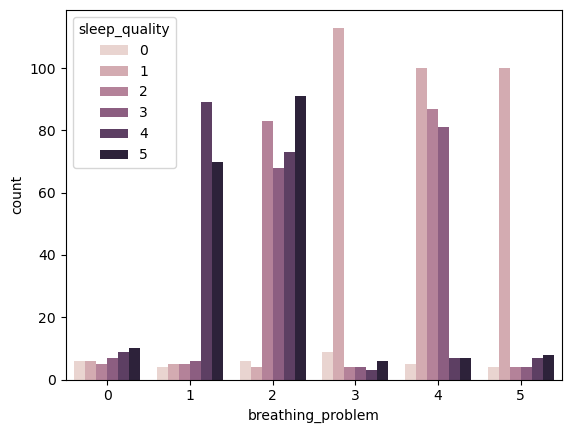

In [6]:
sns.countplot(data=stress_df, x='breathing_problem', hue='sleep_quality')

This is a breathing problem and sleep quality correlation that we can see using a countplot. A countplot works with a single variable and shows with bars how it is affected by a second variable. If you don't have a breathing problem, then sleep quality shows to be indifferent, making it probably an external factor that is causing sleep problems. Someone who has a small amount of breathing problems, such as x=1-2, their sleep quality is very good, which makes sense. But, in x=2, we can see that some people also have a pretty medium sleep quality. This again could be because of external factors that are not based on breathing problems. Someone with mid to high breathing problems is not getting good quality sleep. We see a lot of y=1 throughout x=3-5. But something interesting is in x=4. This means someone has a big breathing problem, but some of them can get decent sleep.

### Barplot of Mental Health History (Binary) and Academic Performance
### Barplot of Living Conditoins and Academic Performance

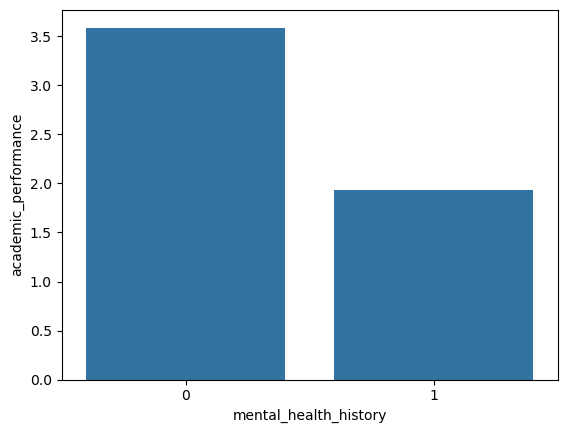

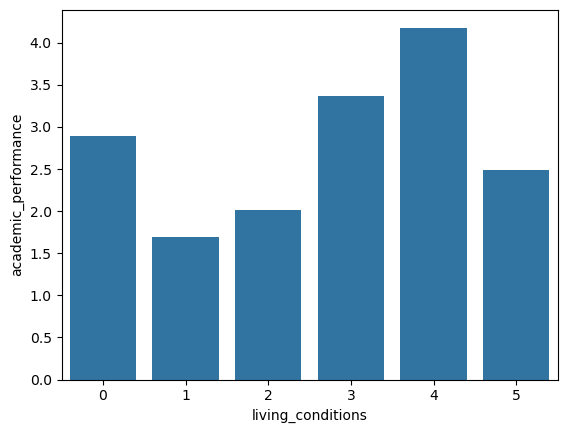

In [7]:
sns.barplot(data=stress_df, x='mental_health_history', y='academic_performance', errorbar=None)
plt.show()
sns.barplot(data=stress_df, x='living_conditions', y='academic_performance', errorbar=None)
plt.show()

In this analysis, I wanted to understand how mental health history and living conditions can affect academic performance. In our data, mental health is a binary category, with 0 meaning no history and 1 meaning yes. We can see that not having a mental health history is leading to a higher performance in academia. In the living conditions, which go from good(0) to stressful(5), the best academic performance comes from a pretty unpleasant living condition. Heuristically, I read this as a strict household that could be very pressuring to the student to get better grades in school. We can also see that the third highest in performance are students with very pleasant households. It seems that when the living conditions become incredibly stressful, the academic performance falls. We could also read into this as not having a good amount of stress in a household can mean they do not check on students' grades or how well they are doing academically, leading to a lower performance.

### Barplot of Anxiety Levels and Self Esteem
### Barplot of Depression and Self Esteem

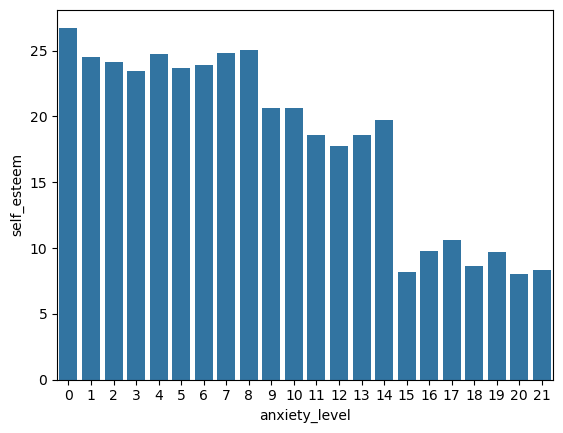

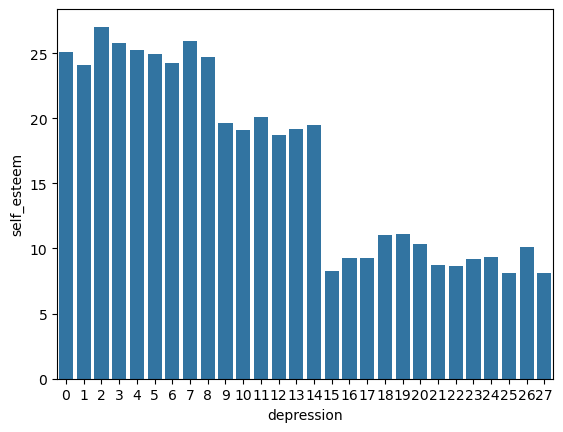

In [8]:
sns.barplot(data=stress_df, x='anxiety_level', y='self_esteem', errorbar=None)
plt.show()
sns.barplot(data=stress_df, x='depression', y='self_esteem', errorbar=None)
plt.show()

I wanted to find if there was a relationship between anxiety and depression with a student's self-esteem. These graphs show that the lower someone's anxiety and depression are, the higher their self-esteem. You can see at the midpoint of both graphs, the self-esteem level dips and then continues to dip until the highest points of depression and anxiety. 

### Barplot of Self Esteem and Stress Levels
### Barplot of Sleep Quality and Stress Levels

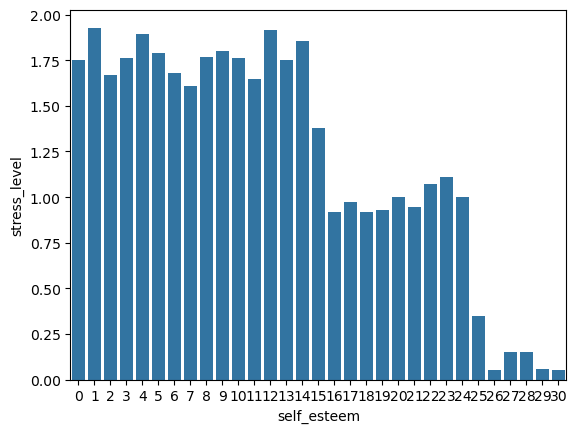

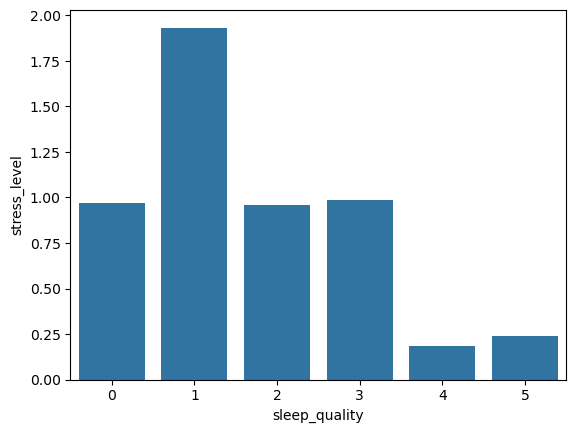

In [9]:
sns.barplot(data=stress_df, x='self_esteem', y='stress_level', errorbar=None)
plt.show()
sns.barplot(data=stress_df, x='sleep_quality', y='stress_level', errorbar=None)
plt.show()

Now, for the final visualization, I wanted to check: How does the sleep quality and self-esteem relate to the stress level of a student? Starting with self-esteem, we can see that having low to medium self-esteem is causing a great amount of stress to a students' lives. As you get to people who have high self-esteem, there is a dramatic drop in stress level to almost none. We see the same with sleep quality, as bad sleep is correlated with a higher level of stress. Students with better sleep tend to experience lower stress levels, as evidenced by their reduced emotional extremes.

## What have I learned?
I gathered this data and used it to see why students fall into high stress and, in general, what causes stress and other factors in students to rise. I saw that sometimes, having breathing problems is not going to take away from good sleep, but in regards to stress, having bad sleep increases stress levels by a great amount. I also learned how harsh living conditions and having some history with mental health issues can lower your academic performance or hurt it in some ways. I then looked into some of the most common mental health disorders, anxiety and depression. Both of these play a huge factor in a student's self-esteem; high anxiety/depression can reduce the self-esteem a student has. From that, low self-esteem will greatly increase the stress of a student.

## Impact:
In these findings, it can be said that we can help students by understanding their needs and how they feel, which impacts their stress levels. But there can also be harm to these findings. The biggest harm is the way this data has been grouped and measured. A lot of these categories are ordinal, meaning they numerical ranking form, even for those that don't seem to need it. This can make it very hard to visualize the data and understand what you are seeing. It can also be confusing as to which numbers, high or low, are better or worse in a certain feature. A good thing from these findings is understanding how mental health plays a big role in stress. Not only did we see that someone with a past mental health history performed worse, but we also dove into anxiety and depression, correlating high levels of them to low self-esteem. We then found out that low self-esteem can increase the stress levels of a student by a lot. <br/>
There are also missing perspectives in play here. Data is only meaningful when we give it meaning, but we cannot give it false meaning. We just said a lot about mental health's role, but we don't know if these students are actively in therapy, taking action, or if their families are helping or not. Because of this, it can be very harmful to think that a lot of these correlations can lead to a causation in these actions. It is best to take this at face value for now, as we don't have enough data to generalize it for a complex problem such as the psyche of human beings.

## References
Ovi, Md Sultanul Islam; Hossain, Jamal; Rahi, Md Raihan Alam; Akter, Fatema.  
*Protecting Student Mental Health with a Context-Aware Machine Learning Framework for Stress Monitoring.*  
arXiv preprint arXiv:2508.01105, 2025.